<a href="https://colab.research.google.com/github/Mmbsaksd/Bank-Churn-with-ANN/blob/main/Bank_Churning_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#Loading dataset
df = pd.read_csv('/content/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [10]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [12]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [14]:
#Differntiating the feature columns and target columns
x = df.iloc[:,3:13]
y = df.iloc[:,13]

In [15]:
#Create dummy variable
geography_dm = pd.get_dummies(x['Geography'],drop_first=True)
gender_dm = pd.get_dummies(x['Gender'], drop_first=True)

In [16]:
#Concatenate dummies data to x
x = pd.concat([x,geography_dm,gender_dm],axis=1)

In [17]:
#Drop the unnecessory columns
x = x.drop(['Geography','Gender'],axis=1)
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [18]:
#Splitting the dataset into traning and testing dataset
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

In [19]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
xtrain = sd.fit_transform(xtrain)
xtest = sd.fit_transform(xtest)

In [20]:
#Importing ANN libraries like keras
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [26]:
#Building the first Artificial Neoral Network
classifier = Sequential()
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu',input_dim = 11))
classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation='relu'))
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform',activation='sigmoid'))


classifier.compile(optimizer='Adamax', loss='binary_crossentropy',metrics=['accuracy'])

model = classifier.fit(xtrain,ytrain, validation_split=0.33, batch_size = 10, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5850 - accuracy: 0.7876 - val_loss: 0.5465 - val_accuracy: 0.7910
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5173 - accuracy: 0.7962 - val_loss: 0.5119 - val_accuracy: 0.7910
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4930 - accuracy: 0.7962 - val_loss: 0.4935 - val_accuracy: 0.7910
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4780 - accuracy: 0.7962 - val_loss: 0.4798 - val_accuracy: 0.7910
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4664 - accuracy: 0.7964 - val_loss: 0.4691 - val_accuracy: 0.7910
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4566 - accuracy: 0.7985 - val_loss: 0.4602 - val_accuracy: 0.7925
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4481 - accuracy: 0.8028 - val_loss: 0.4535 - val_accuracy: 0.7993

In [28]:
print(model.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


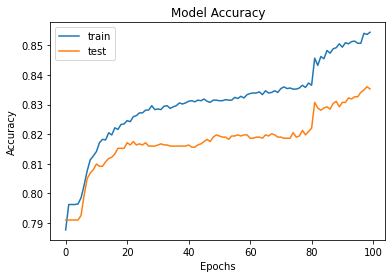

In [30]:
#Plotting the summery of hostory for loss
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

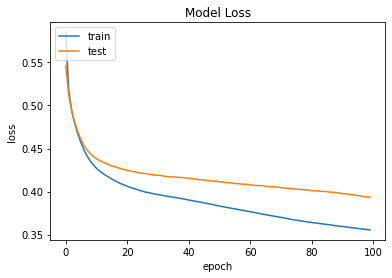

In [29]:
#Plotting the summery of trained ANN
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

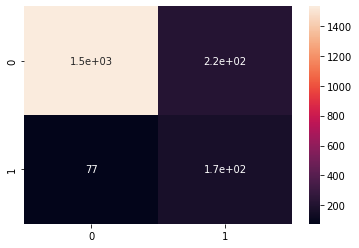

In [40]:
#Making confusion metrix for the prediction and accertaining the evaluation of model
from sklearn.metrics import confusion_matrix
ypred = classifier.predict(xtest)
ypred = (ypred>0.5)
cm = confusion_matrix(ypred,ytest)

#Graphical Plotting
import seaborn as sns
sns.heatmap(cm, annot=True)

In [39]:
#Calculating the accuracy of model
from sklearn.metrics import accuracy_score
score = accuracy_score(ypred, ytest)
score

0.851

In [35]:
ytest

6252    0
4684    0
1731    0
4742    0
4521    0
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 2000, dtype: int64